In [4]:
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings("ignore")

from utils import *
from tqdm.auto import tqdm
import numpy as np
import pickle
import os

from experiment import unpack_and_dequantize

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

  0%|          | 0/1024 [00:00<?, ?it/s]

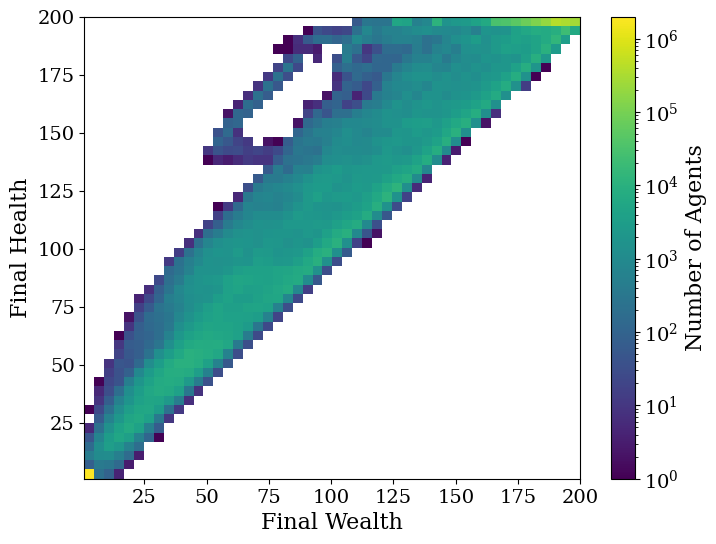

In [2]:
for i, model in enumerate(["../cpt/"]):
    file_list = os.listdir(model)

    w_final = np.array([])
    h_final = np.array([])

    for f in tqdm(file_list):
        with open(model+f, "rb") as file:
            res = pickle.load(file)
        w = unpack_and_dequantize(res["wealth"][:,-1], 200)
        h = unpack_and_dequantize(res["health"][:,-1], 200)
        
        w_final = np.concatenate([w_final, w])
        h_final = np.concatenate([h_final, h])
    
    # Create 2D histogram
    plt.figure(figsize=(8, 6))
    plt.hist2d(w_final, h_final, bins=50, cmap='viridis', norm="log")
    plt.colorbar(label='Number of Agents')
    plt.xlabel('Final Wealth')
    plt.ylabel('Final Health')
    plt.xlim(1,200)
    plt.ylim(1,200)
    plt.show()

  0%|          | 0/1024 [00:00<?, ?it/s]

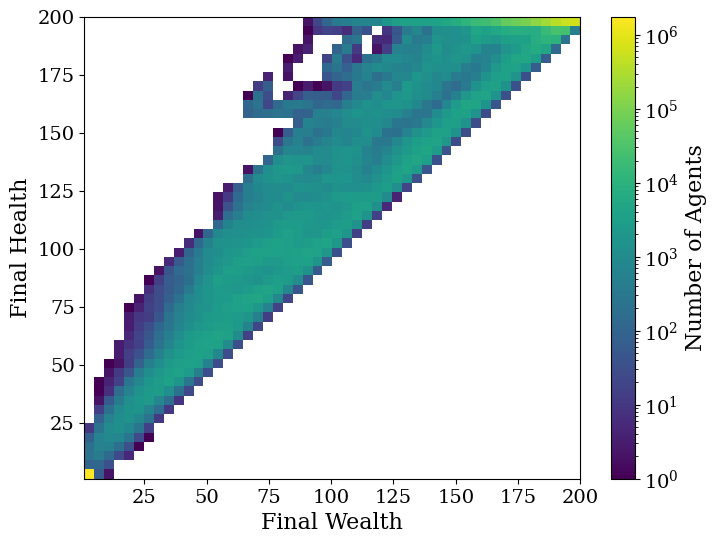

In [3]:
for i, model in enumerate(["../nocpt/"]):
    file_list = os.listdir(model)

    w_final = np.array([])
    h_final = np.array([])

    for f in tqdm(file_list):
        with open(model+f, "rb") as file:
            res = pickle.load(file)
        w = unpack_and_dequantize(res["wealth"][:,-1], 200)
        h = unpack_and_dequantize(res["health"][:,-1], 200)
        
        w_final = np.concatenate([w_final, w])
        h_final = np.concatenate([h_final, h])
    
    # Create 2D histogram
    plt.figure(figsize=(8, 6))
    plt.hist2d(w_final, h_final, bins=50, cmap='viridis', norm="log")
    plt.colorbar(label='Number of Agents')
    plt.xlabel('Final Wealth')
    plt.ylabel('Final Health')
    plt.xlim(1,200)
    plt.ylim(1,200)
    plt.show()